In [1]:
import matplotlib
matplotlib.use('nbagg')
import numpy as np

In [50]:
# %quickref       #  for reference tab

<h1 align = "center">Import NetCDF libraries</h1>

In [3]:
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import matplotlib as mplib
#import numpy as np
#from mpl_toolkits.basemap import Basemap

<h2 align = "center">Open NetCDF file</h2>

In [281]:
%cd /home/mariornaranjo/Desktop/TutorialDocsPALM/Exercise3/e3_cube_cyc/OUTPUT/
#%pwd
dataset = NetCDFFile('e3_cube_cyc_pr.nc')

/home/mariornaranjo/Desktop/TutorialDocsPALM/Exercise3/e3_cube_cyc/OUTPUT


In [282]:
#print(dataset.file_format)
print('\n',dataset.data_model)
#dataset.close


 NETCDF3_64BIT_OFFSET


<h3 align = "center">Interrogating dimensions</h3>

In [6]:
#print(dataset.dimensions)
#print('\n',dataset.dimensions.keys())
#print('\n',dataset.dimensions.values())

In [7]:
print('\n',dataset.dimensions['time'])
#print('\n len(time)=', len(dataset.dimensions['time']))
#print('\n',dataset.dimensions['time'].isunlimited())


 <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 3



In [8]:
#for dimobj in dataset.dimensions.values():
#    print(dimobj)

<h3 align = "center">Interrogating variables</h3>

In [106]:
#print(dataset.variables)
#print('\n',dataset.variables['w*u*'])
#print('\n len(time)=', len(dataset.variables['time']))

In [10]:
#print(dataset.__dict__)
#print('\n', dataset.__dict__['title'][:])
#print('\n time average: ', dataset.__dict__['time_avg'][:])
#print('\n number of rows: ', dataset.__dict__['no_rows'])
#print('\n number of columns: ', dataset.__dict__['no_columns'])
#print('\n cross profiles: ', dataset.__dict__['cross_profiles'][1:44])
#print('\n variable list: ', dataset.__dict__['VAR_LIST'][1:44])

In [11]:
for attr in dataset.ncattrs():
    print (attr, '=', getattr(dataset, attr))

title = PALM 5.0  Rev: 2866  run: e3_cube_cyc.00  host: default  29-03-18 18:40:51,  1800.0 s average
time_avg =  1800.0 s avg
no_rows = 3
no_columns = 2
cross_profiles = ;u,v;w"u",w*u*,wu,w"v",w*v*,wv;km;l;u*2;v*2;w;w*2;e;e*;
VAR_LIST = ;u;u*2;wu;w*u*;w"u";v;v*2;wv;w*v*;w"v";w;w*2;e;e*;km;l;


In [329]:
print('\n', dataset.__dict__['title'])
print('\nTitle:', dataset.__dict__['title'][26:37], '***OR in a cleaner way:', dataset.title[26:37],'***')
print('\n cross profiles: ', dataset.cross_profiles)


 PALM 5.0  Rev: 2866  run: e3_cube_cyc.00  host: default  29-03-18 18:40:51,  1800.0 s average

Title: e3_cube_cyc ***OR in a cleaner way: e3_cube_cyc ***

 cross profiles:  ;u,v;w"u",w*u*,wu,w"v",w*v*,wv;km;l;u*2;v*2;w;w*2;e;e*;


In [330]:
time = dataset.variables['time']
#    Velocity Components
u = dataset.variables['u']
v = dataset.variables['v']
w = dataset.variables['w']
#    Variance or horiz/vert momentum flux of the u/v/w-velocity component
us2 = dataset.variables['u*2']
vs2 = dataset.variables['v*2']
#ws2 = dataset.variables['w*2'][:]
#    u/v-component of the total vertical momentum flux
wu = dataset.variables['wu']
wv = dataset.variables['wv']
#    Covariance or u/v-component of the resolved vertical momentum flux
wsus = dataset.variables['w*u*']
wsvs = dataset.variables['w*v*']
#    u/v-component of the subgrid-scale vertical momentum flux
w_pp_u_pp = dataset.variables['w"u"']
w_pp_v_pp = dataset.variables['w"v"']
#    Potential temperature(K)
#pt = dataset.variables['pt'][:]
#    Variance of the potential temperature
#pts2 = dataset.variables['pt*2'][:]
#    Eddy diffusivity for momentum
km = dataset.variables['km']
#    Mixing length
l = dataset.variables['l']

#    Turbulence kinetic energy (TKE, subgrid-scale)
e = dataset.variables['e']
#    Perturbation energy (resolved) (composed of variances or fluxes, see details)
es = dataset.variables['e*']

#xpt = dataset.variables['xpt'][:]
#xpts2 = dataset.variables['xpt*2'][:]
#ypt = dataset.variables['ypt'][:]
#ypts2 = dataset.variables['ypt*2'][:]



#w_xy = dataset.variables['w_xy'][:];w_xy

#pt_xy = dataset.variables['pt_xy'][:];pt_xy#zu_xy = dataset.variables['zu_xy'][:]
#zw_xy = dataset.variables['zw_xy'][:]
#zu1_xy = dataset.variables['zu1_xy'][:]
#ind_z_xy = dataset.variables['ind_z_xy'][:]

#x = dataset.variables['x'][:]
#xu = dataset.variables['xu'][:]
#xv = dataset.variables['xv'][:]
#xw = dataset.variables['xw'][:]

#y = dataset.variables['y'][:]
#yu = dataset.variables['yu'][:]
#yv = dataset.variables['yv'][:]
#yw = dataset.variables['yw'][:]

#z = dataset.variables['z'][:]
zu = dataset.variables['zu']
zv = dataset.variables['zv']
zw = dataset.variables['zw']
ze = dataset.variables['ze']
zkm = dataset.variables['zkm']
zl = dataset.variables['zl']

zes = dataset.variables['ze*']

zus2 = dataset.variables['zu*2']
zvs2 = dataset.variables['zv*2']
zws2 = dataset.variables['zw*2']

zwu = dataset.variables['zwu']
zwv = dataset.variables['zwv']

zwsus = dataset.variables['zw*u*']
zwsvs = dataset.variables['zw*v*']

zw_pp_u_pp = dataset.variables['zw"u"']
zw_pp_v_pp = dataset.variables['zw"v"']

#zpt = dataset.variables['zpt'][:]
#zpts2 = dataset.variables['zpt*2'][:]

#    REMAINDER AT BOTTOM OF NOTEBOOK

In [331]:
print('\n',dataset.dimensions.keys())


 odict_keys(['time', 'zu', 'zu*2', 'zwu', 'zw*u*', 'zw"u"', 'zv', 'zv*2', 'zwv', 'zw*v*', 'zw"v"', 'zw', 'zw*2', 'ze', 'ze*', 'zkm', 'zl'])


In [336]:
#pt_xy_1 = pt_xy[0][0][:][:]
#pt_xy_2 = pt_xy[1][0][:][:]
#pt_xy_3 = pt_xy[2][0][:][:]
#pt_xy_4 = pt_xy[3][0][:][:]

#plt.contourf(x, y, w_xy_4)

#plt.contourf(y, x, pt_xy_1);
#plt.contourf(y, x, pt_xy_2);
#plt.contourf(y, x, pt_xy_3);
#plt.contourf(y, x, pt_xy_4);

In [333]:
m,n = u.shape;

print("There are ", m, " timesteps.")
print("The units of w*u* are: ",dataset.variables['w*u*'].units)

There are  3  timesteps.
The units of w*u* are:  m2/s2


In [337]:
plt.close('all');

<IPython.core.display.Javascript object>


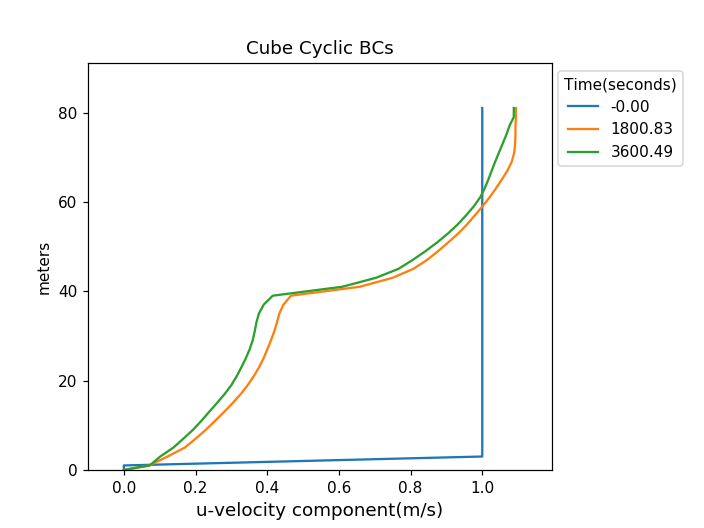

In [308]:
#    Enter x, y variables to plot:
x_var, y_var = u, zu
m,n = x_var.shape

# this is twice as tall as it is wide: fig = plt.figure(figsize=plt.figaspect(2)) 
#fig = plt.figure(figsize = (7, 5)) 
#fig = plt.figure() 
#ax = fig.add_subplot(111)    # 1 row, 1 column
fig, ax = plt.subplots()
ax.set_xlim(min(np.reshape(x_var,x_var.size))-0.1, max(np.reshape(x_var,x_var.size))+0.1)
ax.set_ylim(min(y_var), max(y_var)+10)

#plt.plot draws points w/ lines connecting them
#plt.scatter draws unconnected points
for i in range(0,m):
    plt.plot(x_var[i],y_var, label='{0:.2f}'.format(time[i]))
#    plt.cla()
##############       Change Title          #############################
ax.set_title('Cube Cyclic BCs')
ax.set_xlabel('{0}-velocity component({1})'.format(x_var.long_name, x_var.units), size = 12);
ax.set_ylabel('{0}'.format(y_var.units, size = 12))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.85, box.height])

plt.legend(fancybox = True, loc=1, title = 'Time({0})'.format(time.units), bbox_to_anchor=(1.3, 1.0))
plt.show()

fig.savefig('{0}-{1}-component.pdf'.format(dataset.title[26:37], x_var.long_name), bbox_inches='tight', transparent=True)

In [234]:
plt.close('all');plt.close('all');

In [253]:
u

<class 'netCDF4._netCDF4.Variable'>
float32 u(time, zu)
    units: m/s
    long_name: u
unlimited dimensions: time
current shape = (3, 42)
filling off

<IPython.core.display.Javascript object>


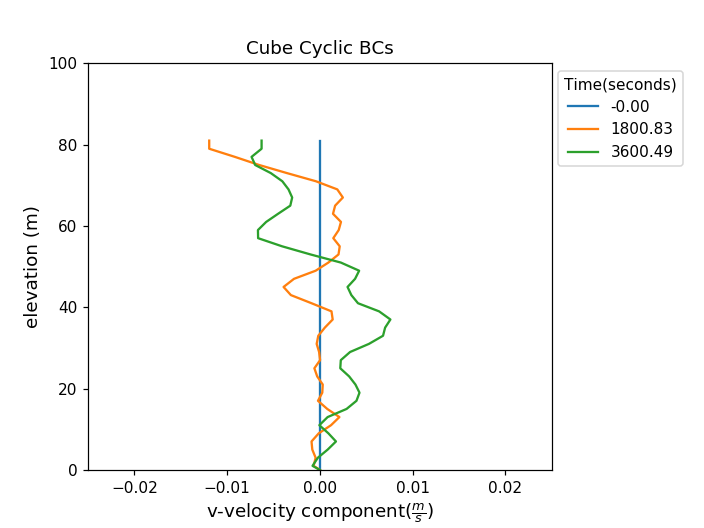

In [309]:
#    Enter x, y variables to plot:
x_var, y_var = v, zv
m,n = x_var.shape

# this is twice as tall as it is wide: fig = plt.figure(figsize=plt.figaspect(2)) 
#fig = plt.figure(figsize = (7, 5)) 
#fig = plt.figure() 
#ax = fig.add_subplot(111)    # 1 row, 1 column
fig, ax = plt.subplots()
ax.set_xlim(min(np.reshape(x_var,x_var.size))-0.01, max(np.reshape(x_var,x_var.size))+0.01)
ax.set_ylim(min(y_var), max(y_var)+10)

#plt.plot draws points w/ lines connecting them
#plt.scatter draws unconnected points
for i in range(0,m):
    plt.plot(x_var[i],y_var, label='{0:.2f}'.format(time[i]))
#    plt.cla()
##############       Change Title          #############################
ax.set_title('Cube Cyclic BCs')
ax.set_xlabel('{0}-velocity component({1})'.format(x_var.long_name, x_var.units), size = 12);
ax.set_ylabel('{0}'.format(y_var.units, size = 12))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.85, box.height])

plt.legend(fancybox = True, loc=1, title = 'Time({0})'.format(time.units), bbox_to_anchor=(1.3, 1.0))
plt.show()

fig.savefig('{0}-{1}-component.pdf'.format(dataset.title[26:37], x_var.long_name), bbox_inches='tight', transparent=True)

<IPython.core.display.Javascript object>


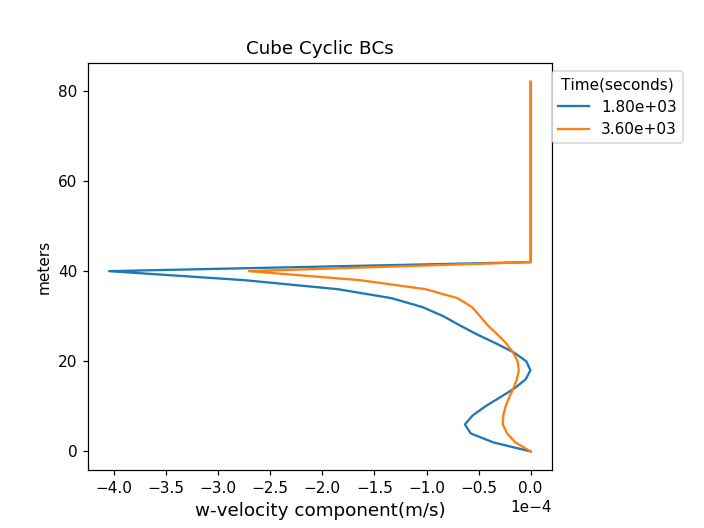

In [357]:
#    Enter x, y variables to plot:
x_var, y_var = w, zw
m,n = x_var.shape

# this is twice as tall as it is wide: fig = plt.figure(figsize=plt.figaspect(2)) 
#fig = plt.figure(figsize = (7, 5)) 
#fig = plt.figure() 
#ax = fig.add_subplot(111)    # 1 row, 1 column
fig, ax = plt.subplots()
#ax.set_xlim(min(np.reshape(x_var,x_var.size))-0.01, max(np.reshape(x_var,x_var.size))+0.01)
#ax.set_ylim(min(y_var), max(y_var)+10)

#plt.plot draws points w/ lines connecting them
#plt.scatter draws unconnected points
for i in range(1,m):
    plt.plot(x_var[i],y_var, label='{0:.2e}'.format(time[i]))
#    plt.cla()
##############       Change Title          #############################
ax.set_title('Cube Cyclic BCs')
ax.set_xlabel('{0}-velocity component({1})'.format(x_var.long_name, x_var.units), size = 12);
ax.set_ylabel('{0}'.format(y_var.units, size = 12))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.85, box.height])

plt.legend(fancybox = True, loc=1, title = 'Time({0})'.format(time.units), bbox_to_anchor=(1.3, 1.0))
plt.show()

fig.savefig('{0}-{1}-component.pdf'.format(dataset.title[26:37], x_var.long_name), bbox_inches='tight', transparent=True)

<IPython.core.display.Javascript object>


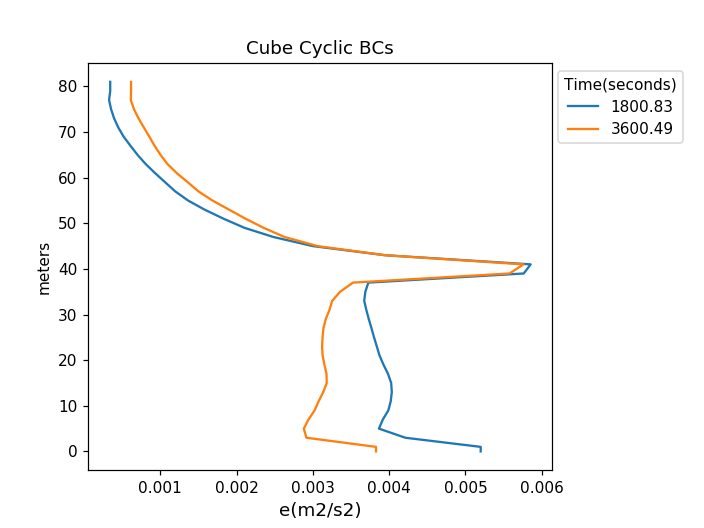

In [352]:
#    Enter x, y variables to plot:
x_var, y_var = e, ze
m,n = x_var.shape

# this is twice as tall as it is wide: fig = plt.figure(figsize=plt.figaspect(2)) 
#fig = plt.figure(figsize = (7, 5)) 
#fig = plt.figure() 
#ax = fig.add_subplot(111)    # 1 row, 1 column
fig, ax = plt.subplots()
#ax.set_xlim(min(np.reshape(x_var,x_var.size)), max(np.reshape(x_var,x_var.size)))
#ax.set_ylim(min(y_var), max(y_var)+10)

#plt.plot draws points w/ lines connecting them
#plt.scatter draws unconnected points
for i in range(1,m):
    plt.plot(x_var[i],y_var, label='{0:.2f}'.format(time[i]))
#    plt.cla()
##############       Change Title          #############################
ax.set_title('Cube Cyclic BCs')
ax.set_xlabel('{0}({1})'.format(x_var.long_name, x_var.units), size = 12);
ax.set_ylabel('{0}'.format(y_var.units, size = 12))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.85, box.height])

plt.legend(fancybox = True, loc=1, title = 'Time({0})'.format(time.units), bbox_to_anchor=(1.3, 1.0))
plt.show()

fig.savefig('{0}-{1}-component.pdf'.format(dataset.title[26:37], x_var.long_name), bbox_inches='tight', transparent=True)

<h3 align = "center"> Closes all active figures </h3>

In [360]:
plt.close('all');
plt.close('all');

Traceback (most recent call last):
  File "/home/mariornaranjo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/mariornaranjo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/mariornaranjo/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_nbagg.py", line 241, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "/home/mariornaranjo/anaconda3/lib/python3.6/site-packages/matplotlib/_pylab_helpers.py", line 58, in destroy
    cls._activeQue.remove(manager)
ValueError: list.remove(x): x not in list
Traceback (most recent call last):
  File "/home/mariornaranjo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/mariornaranjo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", l

In [361]:
min(np.reshape(e,e.size))
#max(np.reshape(e,e.size))

0.0003297005

<IPython.core.display.Javascript object>


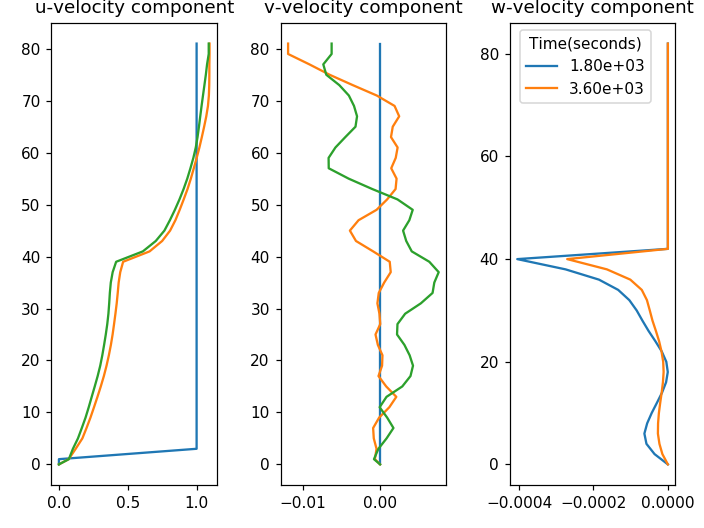

In [373]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout()
#fig = plt.figure(figsize = (6, 4))
axes[0].set(title='u-velocity component')
axes[1].set(title='v-velocity component')
axes[2].set(title='w-velocity component')
# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
#for ax in axes.flat:
#    # Remove all xticks and yticks...
#    ax.set(xticks=[], yticks=[])
#    ax.set_xlim(min(x),max(x))
#    ax.set_ylim(min(y2)-0.125,max(y3)+0.125)
for i in range(0,m):
    axes[0].plot(u[i][:],zu, label='{0:.2e}'.format(time[i]))
    axes[1].plot(v[i][:],zu, label='{0:.2e}'.format(time[i]))
for i in range(1,m):
    axes[2].plot(w[i][:],zw, label='{0:.2e}'.format(time[i]))

##axes[0].set_xlim(-.5, 5.5)
##axes[1].set_xlim(-0.5, 2)
#axes[2].set_xlim(-3.5e-18, 3.0e-18)
plt.legend(fancybox = True, loc=0, title = 'Time({0})'.format(time.units), bbox_to_anchor=(0.9, 1.0)) 
plt.show()
fig.savefig('u_v_and_w-components.pdf', bbox_inches='tight', transparent=True)

In [19]:
##fig, axes = plt.subplots(nrows=1, ncols=2)
##fig.tight_layout()
#fig = plt.figure(figsize = (6, 4))
##axes[0].set(title='u-velocity component')
##axes[1].set(title='v-velocity component')
#axes[2].set(title='w-velocity component')
# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
#for ax in axes.flat:
#    # Remove all xticks and yticks...
#    ax.set(xticks=[], yticks=[])
#    ax.set_xlim(min(x),max(x))
#    ax.set_ylim(min(y2)-0.125,max(y3)+0.125)
##for i in range(0,m):
##    axes[0].plot(u[i][:],zu)
##    axes[1].plot(v[i][:],zu)
#    axes[2].plot(w[i][:],zw)

##axes[0].set_xlim(-.5, 5.5)
##axes[1].set_xlim(-0.5, 2)
#axes[2].set_xlim(-3.5e-18, 3.0e-18)
    
##plt.show()
##fig.savefig('u_and_v-components.pdf', bbox_inches='tight', transparent=True)

In [20]:
#    Get dimensions of horizontal variables array for plot loop
##m,n = w.shape
# this is twice as tall as it is wide: fig = plt.figure(figsize=plt.figaspect(2)) 
#fig = plt.figure(figsize = (7, 7)) 
##fig = plt.figure() 
##ax = fig.add_subplot(111)    # 1 row, 1 column
##ax.set(xlim = [-3.50e-18, 3.0e-18], ylim = [0, 1800]);

#plt.plot draws points w/ lines connecting them
#plt.scatter draws unconnected points
##for i in range(0,m):
##    plt.plot(w[i][:],zw)

##ax.set_xlabel(r'w-velocity component($\frac{m}{s}$)', size = 12);
##ax.set_ylabel('elevation (m)', size = 12);

##plt.show()
##fig.savefig('w-component.pdf', bbox_inches='tight', transparent=True)

In [21]:
plt.close('fig')

In [22]:
plt.close()

In [23]:
#xpt = dataset.variables['xpt'][:]
#xpts2 = dataset.variables['xpt*2'][:]
#ypt = dataset.variables['ypt'][:]
#ypts2 = dataset.variables['ypt*2'][:]


NORM_wpt0 = dataset.variables['NORM_wpt0'][:]
#NORM_ws2 = dataset.variables['NORM_ws2'][:]
NORM_tsw2 = dataset.variables['NORM_tsw2'][:]
#NORM_ws3 = dataset.variables['NORM_ws3'][:]
#NORM_ws2tsw = dataset.variables['NORM_ws2tsw'][:]
#NORM_wstsw2 = dataset.variables['NORM_wstsw2'][:]
#NORM_z_i = dataset.variables['NORM_z_i'][:]

#w_xy = dataset.variables['w_xy'][:];w_xy

#pt_xy = dataset.variables['pt_xy'][:];pt_xy#zu_xy = dataset.variables['zu_xy'][:]
#zw_xy = dataset.variables['zw_xy'][:]
#zu1_xy = dataset.variables['zu1_xy'][:]
#ind_z_xy = dataset.variables['ind_z_xy'][:]

#x = dataset.variables['x'][:]
#xu = dataset.variables['xu'][:]
#xv = dataset.variables['xv'][:]
#xw = dataset.variables['xw'][:]

#y = dataset.variables['y'][:]
#yu = dataset.variables['yu'][:]
#yv = dataset.variables['yv'][:]
#yw = dataset.variables['yw'][:]

In [24]:
print('\n',dataset.dimensions.keys())


 odict_keys(['time', 'zu', 'zu*2', 'zwu', 'zw*u*', 'zw"u"', 'zv', 'zv*2', 'zwv', 'zw*v*', 'zw"v"', 'zw', 'zw*2', 'ze', 'ze*', 'zkm', 'zl'])
